In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PATH_CALIBRE = 'c:/Users/milen/Biblioteca de calibre/'
lang = "ES"  # >>>

In [ ]:
# [print(x) for x in elige_libros_aleatorios(1)]

# 1 Selección de libros

## a) Un libro en particular

In [ ]:
one_book = True

In [ ]:
# i) por el más reciente
last, all_ = seleccion_txt(PATH_CALIBRE)
book = get_filename(last[0], True)
book

In [ ]:
# ii) alternativamente, por patrón
# pat='Huasca'#<<<<<<
# book=[get_filename(x, True) for x in all_ if pat in x][0]
# book

In [ ]:
file = [x for x in all_ if book in x]

### a.1) libros de referencia para hacer el tf-idf

In [ ]:
date_es = 20220703 if lang == 'EN' else 20200504
files_es, _ = seleccion_txt(PATH_CALIBRE, fecha=date_es)
files = file + files_es
doc_list = [txt_read(x) for x in files]

## b) De última extracción calibre

In [6]:
from utils import get_books
doc_list, files = get_books(PATH_CALIBRE)
# files

** La ultima fecha de ficheros es:  20231015
                                                    0
0     Por que mentimos_. en especial - Dan Ariely.txt
1                  Metro 2033 - Dmitry Glukhovsky.txt
2    La Araucana - Don Alonso De Ercilla y Zuniga.txt
3             Cuentos completos - Edgar Allan Poe.txt
4                        Eureka - Edgar Allan Poe.txt
5   Los crimenes de la rue Morgue - Edgar Allan Po...
6      Asi hablo Zaratustra - Friedrich Nietzsche.txt
7           Ante todo no hagas dano - Henry Marsh.txt
8                              La Iliada - Homero.txt
9                              La Odisea - Homero.txt
10               Los ninos del Brasil - Ira Levin.txt
11                       Ygdrasil - Jorge Baradit.txt
12               Don Juan Tenorio - Jose Zorrilla.txt
13    El Capital (P. Scaron) Libro te - Karl Marx.txt
14  Electrodinamica cuantica - Richard P. Feynman.txt
15       Seis piezas faciles - Richard P. Feynman.txt
16  _Que te importa lo que piensen - 

# 2 Fakes
Creación de título y autor falso

In [8]:
from utils_textmining import get_word_matrix
vector_matrix, vocab, _ = get_word_matrix(doc_list) # tfidf

c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
from utils import get_fakes
dic_fake, di_counts = get_fakes(doc_list, files, vector_matrix, vocab, lang, openAI=True)


** Iniciando: Get fakes
** Generando título con OpenAI
      Título generado:  El engaño en los experimentos sociales: dólares y trampas
  El engaño en los experimentos sociales: dólares y trampas (Por que mentimos_. en especial a no)
** Generando título con OpenAI
      Título generado:  Túnel de estaciones: El metro que miró preguntó
  Túnel de estaciones: El metro que miró preguntó (Metro 2033)
** Generando título con OpenAI
      Título generado:  Armas bárbaro: furia en el canto gratis
  Armas bárbaro: furia en el canto gratis (La Araucana)
** Generando título con OpenAI
      Título generado:  Globo en el aposento: El relato del caballero
  Globo en el aposento: El relato del caballero (Cuentos completos)
** Generando título con OpenAI
      Título generado:  La tendencia de los átomos en el universo
  La tendencia de los átomos en el universo (Eureka)
** Generando título con OpenAI
      Título generado:  Crimen francés: Voces agudas desde el cuarto piso
  Crimen francés: Voces

In [ ]:
if one_book:
    dic_fake = {0: dic_fake[0]}

In [11]:
# revisamos:
import pandas as pd
pd.DataFrame.from_dict(dic_fake)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
author,Dan Ariely,Dmitry Glukhovsky,Don Alonso De Ercilla y Zuniga,Edgar Allan Poe,Edgar Allan Poe,Edgar Allan Poe,Friedrich Nietzsche,Henry Marsh,Homero,Homero,...,Jose Zorrilla,Karl Marx,Richard P. Feynman,Richard P. Feynman,Richard P. Feynman,Rosa Montero,Sir Arthur Conan Doyle,Steven Pinker,Tim Harford,Victor Hugo
title,Por que mentimos_. en especial a no,Metro 2033,La Araucana,Cuentos completos,Eureka,Los crimenes de la rue Morgue,Asi hablo Zaratustra,Ante todo no hagas dano,La Iliada,La Odisea,...,Don Juan Tenorio,El Capital (P. Scaron) Libro tercer,Electrodinamica cuantica,Seis piezas faciles,_Que te importa lo que piensen los,Lagrimas en la lluvia,El mundo perdido (edicion ilustrada,La tabla rasa_ La negacion moderna,El economista camuflado ataca de nu,Los Miserables
fakeAuthor,Universidad David,Artyom Stalker,Araucana Zuñiga,Mr John,Madler Dios,Morgue Dupin,Véase Nietzsche,Ucrania Mike,Aquiles Héctor,Odiseo Eumeo,...,Juan Oh,Economy Smith,Fig Figura,Tierra P2,Nasa Arlene,Tierra Nopal,Londres Dios,Harris New,Gobiernos Internet,Valjean Marius
fakeTitle,El engaño en los experimentos sociales: dólare...,Túnel de estaciones: El metro que miró preguntó,Armas bárbaro: furia en el canto gratis,Globo en el aposento: El relato del caballero,La tendencia de los átomos en el universo,Crimen francés: Voces agudas desde el cuarto piso,La Caverna de la Sabiduría Habló: La Virtud de...,"Operación cerebral: Pacientes, tumor y cirugía...",Las Naves Divinas: Combate de Dioses Valientes,El Palacio de los Dioses: Oh Nave de Ánimo,...,La estatua del capitán: un lance sepulcral,Capital y renta: Los secretos de la ganancia,Flechas de cristal: Una teoría cuántica fascin...,Teoría de partículas: La energía cuántica de á...,Informe de motores: Problemas y soluciones,Móvil en pantalla: el inspector miró,El Profesor y el Señor de los Monos,La Naturaleza Humana: Una Perspectiva Social,Dólares y precios: El mercado de las ganancias,La niña respondió al anciano en la sala
path,c:/Users/milen/Biblioteca de calibre\Dan Ariel...,c:/Users/milen/Biblioteca de calibre\Dmitry Gl...,c:/Users/milen/Biblioteca de calibre\Don Alons...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Friedrich...,c:/Users/milen/Biblioteca de calibre\Henry Mar...,c:/Users/milen/Biblioteca de calibre\Homero\La...,c:/Users/milen/Biblioteca de calibre\Homero\La...,...,c:/Users/milen/Biblioteca de calibre\Jose Zorr...,c:/Users/milen/Biblioteca de calibre\Karl Marx...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Rosa Mont...,c:/Users/milen/Biblioteca de calibre\Sir Arthu...,c:/Users/milen/Biblioteca de calibre\Steven Pi...,c:/Users/milen/Biblioteca de calibre\Tim Harfo...,c:/Users/milen/Biblioteca de calibre\Victor Hu...
listo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
i,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
names,"[universidad, david, eynav, journal, smorc, yo...","[artyom, melnik, kan, vdnkh, hunter, stalker, ...","[don, araucana, alonso, ercilla, zuñiga, lauta...","[mr, dios, bon, marie, dupin, júpiter, york, j...","[dios, laplace, galaxia, neptuno, eureka, kepl...","[dupin, espanaye, morgue, crímenes, edgar, all...","[véase, nietzsche, evangelio, mateo, jesús, ec...","[bueno, ucrania, londres, igor, uci, melanie, ...","[zeus, héctor, aquiles, agamenón, patroclo, ay...","[odiseo, telémaco, zeus, atenea, penelopea, re...",...,"[don, juan, dios, escena, inés, escultor, luis...","[marx, ii, londres, parís, iii, inglaterra, jo...","[fig, figura, vds, newton, x1, t1, x2, mev, t2...","[tierra, sol, luna, newton, p12, p2, p1, júpit...","[sr, nasa, arlene, rogers, 

In [12]:
from utils import SUMMARIES_JSON
from utils_base import json_update
j = {dic_fake[k]['title']: dic_fake[k] for k in dic_fake}
json_update(j, SUMMARIES_JSON)

# guardamos el json asegurando las tilde

** Creando fichero data_med/summaries.json
** Guardado los datos  en data_med/summaries.json


# 3  POR LIBRO. Get partes. Elegir

#### a) por bulk, pero uno a uno

In [365]:
i_book = 1 # << ir avanzando
file = files[i_book]
filename= file.split('\\')[-1]
filename = filename.split('.')[0]
filename = filename.split(' - ')[0]
print(filename)
texto = doc_list[i_book]

Metro 2033


#### b) Individual (del json)

In [ ]:
j = json_read(SUMMARIES_JSON)
titles = sorted(list(j.keys()))
titles

## 3.1 Cortar

In [366]:
from utils import get_book_datas
texto, img, titulo, d_summary = get_book_datas(filename)

Metro 2033


In [375]:
from utils import cabeza_y_cola
partes, df = cabeza_y_cola(texto, 50) # << Cuántos párrafos mostrar

,parte,len
i,,
3945,"[28] Uno de los barrios comerciales del centro de Moscú, colindante con la Plaza Roja. Los primeros asentamientos datan del siglo XIII, y ya en el...",192
3946,"[29] Pistola de carga automática, continuadora de la Tokarev como arma militar estándar del Ejército Rojo, y posteriormente del Ejército Ruso. <<",145
3947,"[30] Cita de la famosa novela El maestro y Margarita de Mikhail Bulgakov, el cual, a su vez, hace referencia a una legendaria anécdota de la reina...",350
3948,"[31] Pistola empleada por el Ejército Rojo, conocida también como TT-33. Durante los años cincuenta, la Makarov la sustituyó como arma militar est...",168
3949,"[32] La Línea 7 del Metro de Moscú, entre las estaciones Planernaya y Vychino. <<",81
3950,[33] Término afgano que significa «pueblo de montaña». <<,57
3951,[34] Así se llamaba el sistema telefónico especial que conectaba el Kremlin con las administraciones regionales de la Unión Soviética. <<,137
3952,"[35] Término con el que se designa, en general, a los guerrilleros del Cáucaso. <<",82
3953,"[36] La gigantesca cabeza es el monumento en honor a Nogin, en otro tiempo un lugar habitual para citarse en el Metro. En 1917, Victor Pavlovich N...",305


,parte,len
i,,
0,"Lo que queda de la civilización resiste en el último refugio. Estamos en el año 2033. Tras una guerra devastadora, amplias zonas del mundo han que...",187
1,"También Moscú se ha transformado en una ciudad fantasma. Los supervivientes se han refugiado bajo tierra, en la red de metro, y han creado allí un...",510
2,Dmitry Glukhovsky,17
3,Metro 2033,10
4,El último refugio,17
5,ePUB v2.0,9
6,Adruki 18.07.11,15
7,Título original: Метро 2033,27
8,"Dmitry Glukhovsky, 2002.",24


In [368]:
from utils import detecta_ini
ini = detecta_ini(texto, 50)


```20``` Parte I
19 | KAN...
20 | 1...
21 | EN LOS MÁRGENES DEL MUNDO...


In [369]:
from utils import detecta_fin
fin = detecta_fin(texto, i_chunk=-1, nrow=100)

 Cogemos los índices 3895 a 3994

    Te daré las primeras palabras de cada párrafo del final de un libro y sus número correlativo. 
    Quiero que me digas en qué número de párrafo empiezan secciones que no son parte de la historia.
    Las reconocerás por el título como referencias, agradecimientos, postlogo, notas, etc.
    Quiero que entregues el nombre se la sección encontrada y el número de párrafo. 
    El número debe estar entre comillas triples.
    
    Ejemplo: <titulo>, nº ```12```

    ### Párrafos finales

    3895 | Artyom se acordó del extraño m...
3896 | Y así empezó la larga y pacien...
3897 | Artyom les quiso hacer una pre...
3898 | No volvió a apartarse de lo es...
3899 | …y estuvo a punto de aprender ...
3900 | Habría sido suficiente con que...
3901 | Puso la mano sobre el picaport...
3902 | Los corazones de millares de N...
3903 | La oscuridad que le había cubi...
3904 | En ese mismo segundo, el prime...
3905 | Artyom se alzó, con la esperan...
3906 | Una llama an

In [370]:
# fin = 1274  # >>>
# ini = 11  # >>>
d_summary['min'], d_summary['max'] = ini, fin
json_update({d_summary['title']: d_summary}, SUMMARIES_JSON)
d_summary.pop('names', None)
d_summary

Aquí se puede saltar al 02 si solo se quiere hacer un audiobook

## Cortar

In [376]:
from utils import corta
partes, df = corta(partes, df, ini, fin)

In [377]:
df

,parte,len
0,1,1
1,EN LOS MÁRGENES DEL MUNDO,25
2,"—¿Quién anda ahí? ¡Ve a verlo, Artyom!",38
3,"Artyom se levantó de mala gana del lugar que ocupaba junto a la hoguera, y con el fusil de asalto en ristre se adentró en la oscuridad. Se detuvo ...",241
4,—¡Alto ahí! ¡Contraseña!,24
...,...,...
3889,El Jardín Botánico y la VDNKh se habían transformado en un mar de fuego. Grandes volutas de humo negro y grasiento se elevaban pesadamente en el c...,227
3890,Artyom sentía una insoportable estrechez. Pensó que se iba a ahogar. Se arrancó la máscara del rostro y aspiró el aire frío y amargo. Luego se sec...,234
3891,Regresaba al Metro.,19
3892,A su hogar.,11


***** 0
******* nacc=0 nnew=1 nfut=1
***** 1
******* nacc=1 nnew=25 nfut=26
***** 2
******* nacc=26 nnew=38 nfut=64
***** 3
******* nacc=64 nnew=241 nfut=305
***caemos dentro: 305
***** 4
******* nacc=0 nnew=24 nfut=24
***** 5
******* nacc=24 nnew=347 nfut=371
***caemos dentro: 371
***** 6
******* nacc=0 nnew=29 nfut=29
***** 7
******* nacc=29 nnew=174 nfut=203
***** 8
******* nacc=203 nnew=416 nfut=619
***caemos dentro: 619
***** 9
******* nacc=0 nnew=508 nfut=508
***caemos dentro: 508
***** 10
******* nacc=0 nnew=787 nfut=787
***caemos dentro: 787
***** 11
******* nacc=0 nnew=412 nfut=412
***caemos dentro: 412
***** 12
******* nacc=0 nnew=27 nfut=27
***** 13
******* nacc=27 nnew=45 nfut=72
***** 14
******* nacc=72 nnew=324 nfut=396
***caemos dentro: 396
***** 15
******* nacc=0 nnew=1232 nfut=1232
  ** >> pasamos 1232
delta abajo: 300, delta arriba 233 nacc 0  nnew1232 nfut 1232
>>> preferimos pasarnos 1232
***** 16
******* nacc=0 nnew=482 nfut=482
***caemos dentro: 482
***** 17
*****

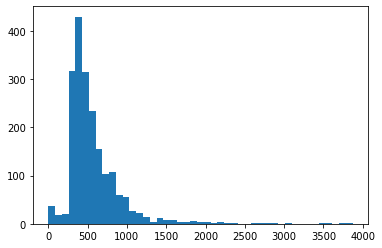

In [378]:
from utils import crea_capsulas
d_summary = crea_capsulas(partes, df, lmin=300, lmax=999)

In [379]:
# from utils import Biblioteca
# biblio = Biblioteca()

In [380]:
from utils import get_next_id_available
id_free = get_next_id_available()

iteración 1
iteración 2
Hemos terminado. Hay 236 libros
El siguiente id disponible es 121


In [381]:
dic_fake[i_book]["nCapitulos"] = len(d_summary)
dic_fake[i_book]["min"] = ini
dic_fake[i_book]["max"] = fin
dic_fake[i_book]["idioma"] = lang
dic_fake[i_book]["libroId"] = id_free # libre en la base de datos

In [385]:
from utils_base import json_read,json_save
d_summaries = json_read(SUMMARIES_JSON)

In [386]:
title = dic_fake[i_book]['title']
d_summaries[title] = dic_fake[i_book]

In [387]:
json_save(d_summaries, SUMMARIES_JSON)

** Guardado los datos  en data_med/summaries.json


# Inserción por Back4app

In [389]:
from utils import upload_lib_summary
d_sum = d_summaries[title]
upload_lib_summary(d_sum)

** Subiendo libro 121 Metro 2033
{'objectId': 'wO9MGNmJKk', 'createdAt': '2023-10-17T07:51:59.077Z'}


# Inserción por mongo

In [390]:
from utils_mongo import get_db, get_colls
db = get_db()
c_lib, c_lib_sum = get_colls(db)

** Collection names:  ['_User', 'librosSum', 'libros', 'diccionario', '_Role', 'objectlabs-system', 'objectlabs-system.admin.collections', '_SCHEMA', '_log']
** Obteniendo colecciones de la base de datos
Nro de libros (summaries) 243
Ejemplo de un summary de libro:  {'_id': '00Nbe0Ey5j', 'fakeAuthor': 'Pearl Jam', 'isMusic': False, '_updated_at': datetime.datetime(2018, 7, 3, 16, 43, 10, 142000), 'author': 'Pearl Jam', '_created_at': datetime.datetime(2016, 9, 5, 11, 26, 58, 120000), 'nCapitulos': 100, 'fakeTitle': 'Best of Pearl Jam', 'title': 'Best of Pearl Jam', 'aux': 0, 'image': '6a9a6655a86a7e57cc460eac130cefab_La Cosecha del Centauro.jpg'}


In [391]:
# preparamos los json para subir masivamente
# tienen que tener los campos: texto, autor, nCapitulo, nLibro, titulo
final = []
autor = d_sum['author']
titulo = d_sum['title']
nLibro = d_sum['libroId']
for i, d_text in d_summary.items():
    d_uno = {'texto': d_text['texto'], 'autor': autor, 'nCapitulo': i, 'nLibro': nLibro, 'titulo': titulo}
    final.append(d_uno)
res = c_lib.insert_many(final)
len(res.inserted_ids)

1985

# Imagen 

In [392]:
# txt_path=files[i_book]
# # quitamos el nombre del archivo
# book_path= txt_path.split('\\')[:-1]
# book_path = '\\'.join(book_path)
# book_path

In [393]:
# from utils import get_image_path
from PIL import Image
# im_path = get_image_path(txt_path)
# print(im_path)
# im=Image.open(im_path)

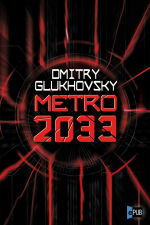

In [394]:
if img.size[0] > 700:
    img = img.reduce(2)
img.reduce(4)

In [398]:
from utils_images import crop
from ipywidgets import interactive, fixed
u = interactive(crop, f=(0.1, 1, 0.05),
                sx=(1, int(img.size[0] * .5)),
                sy=(1, int(img.size[1] * .9)),
                img=fixed(img))
# u
u

interactive(children=(FloatSlider(value=0.55, description='f', max=1.0, min=0.1, step=0.05), IntSlider(value=1…

In [399]:
si = u.result.size[0]
a = 200
b = min(si, 2 * a)
im_low = u.result.resize((a, a))
im_hi = u.result.resize((b, b))

# im_low
# la insertaremos mano luego
# https://parse-dashboard.back4app.com/apps/a8b7aa27-c240-42d5-9567-d95a43ba4b8f/browser/librosSum
base = 'data_out/_images/{}/{}.jpg'
im_low.save(base.format('low', titulo))
im_hi.save(base.format('hi', titulo))